In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dca import DynamicalComponentsAnalysis as DCA
from dca_research.dca_l1 import L1DynamicalComponentsAnalysis as sDCA

from dca.synth_data import gen_lorenz_data
from scipy.stats import special_ortho_group as sog

In [2]:
rng = np.random.RandomState(0)
XL = gen_lorenz_data(20000)

In [3]:
X = rng.randn(20000, 30)
X[:, :3] = XL

In [4]:
init = sog.rvs(30, random_state=rng)[:, :3]

In [5]:
dca_model = DCA(T=10, d=3, verbose=True, init=init)
dca_model.fit(X)
init = dca_model.coef_

PI: 0.136 nats, reg: 0.0
PI: 0.9119 nats, reg: 2.6205
PI: 1.0273 nats, reg: 4.9946
PI: 3.7657 nats, reg: 12.3727
PI: 3.7824 nats, reg: 12.571
PI: 5.9568 nats, reg: 0.1814
PI: 7.5162 nats, reg: 0.3468
PI: 7.5569 nats, reg: 0.4069
PI: 8.3978 nats, reg: 0.1875
PI: 8.7901 nats, reg: 0.073
PI: 8.9777 nats, reg: 0.2381
PI: 9.534 nats, reg: 0.1462
PI: 9.8093 nats, reg: 0.0606
PI: 9.9237 nats, reg: 0.0718
PI: 9.9613 nats, reg: 0.0803
PI: 9.9637 nats, reg: 0.0713
PI: 9.9639 nats, reg: 0.0742
PI: 9.9648 nats, reg: 0.0752
PI: 9.9651 nats, reg: 0.0741
PI: 9.9654 nats, reg: 0.0737
PI: 9.9677 nats, reg: 0.0724
PI: 9.9724 nats, reg: 0.0721
PI: 9.9858 nats, reg: 0.0751
PI: 10.017 nats, reg: 0.0893
PI: 10.0801 nats, reg: 0.1393
PI: 10.1661 nats, reg: 0.245
PI: 10.2361 nats, reg: 0.4404
PI: 10.2894 nats, reg: 0.3728
PI: 10.3066 nats, reg: 0.3831
PI: 10.3077 nats, reg: 0.3846
PI: 10.3081 nats, reg: 0.3771
PI: 10.3091 nats, reg: 0.361
PI: 10.3106 nats, reg: 0.3324
PI: 10.314 nats, reg: 0.2829
PI: 10.3223 

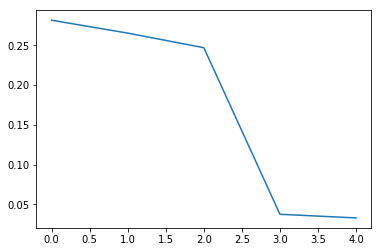

In [6]:
plt.plot(np.sort(np.sum(dca_model.coef_**2, axis=1) / 3.)[::-1][:5])

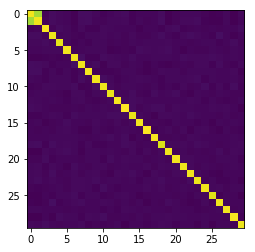

In [7]:
plt.imshow(dca_model.cross_covs[0])

In [8]:
dca_model0 = sDCA(T=10, d=3, verbose=True, init=init)
dca_model0.fit(X)

PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8523 nats, reg: 0.0
PI: 16.8524 nats, reg: 0.0
PI: 16.8524 nats, reg: 0.0
PI: 16.8525 nats, reg: 0.0
PI: 16.8527 nats, reg: 0.0
PI: 16.8533 nats, reg: 0.0
PI: 16.8543 nats, reg: 0.0
PI: 16.8564 nats, reg: 0.0
PI: 16.8582 nats, reg: 0.0
PI: 16.8668 nats, reg: 0.0
PI: 16.8795 nats, reg: 0.0002
PI: 16.9052 nats, reg: 0.0021
PI: 16.9339 nats, reg: 0.021
PI: 16.9665 nats, reg: 0.045
PI: 17.0072 nats, reg: 0.1164
PI: 17.033 nats, reg: 0.0916
PI: 17.0431 nats, reg: 0.1238
PI: 17.0706 nats, reg: 0.21
PI: 17.1086 nats, reg: 0.3859
PI: 17.1287 nats, reg: 0.6316
PI: 17.1311 nats, reg: 0.6311
PI: 17.1321 nats, reg: 0.6301
PI: 17.1333 nats, reg: 0.6651
PI: 17.1345 nats, reg: 0.658
PI: 17.1357 nats, reg: 0.7034
PI: 17.1363 nats, reg: 0.7136
PI: 17.1363 nats, reg: 0.71
PI: 17.1363 

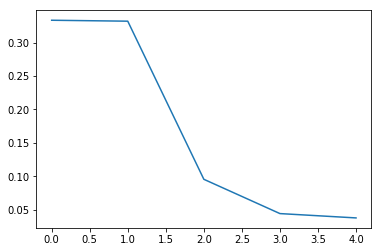

In [9]:
plt.plot(np.sort(np.sum(dca_model0.coef_**2, axis=1) / 3.)[::-1][:5])

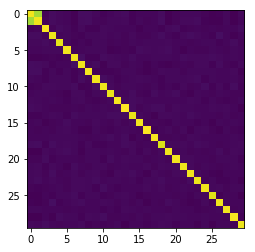

In [10]:
plt.imshow(dca_model0.cross_covs[0])

In [11]:
dca_model1 = sDCA(T=10, d=3, l1_lambda=10., verbose=True, init=init, ortho_lambda=10.)
dca_model1.fit(X)

PI: 16.8523 nats, reg: 0.0
PI: 11.1645 nats, reg: 6.5597
PI: 13.6083 nats, reg: 25.049


/home/jesse/Development/DCA_research/dca_research/lbfgs/__init__.py:205: UserWarning: The line-search routine reaches the maximum number of evaluations.
  return opt.minimize(f, x0, progress=progress, args=args)


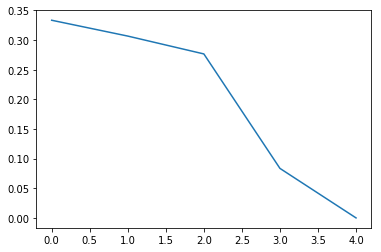

In [12]:
plt.plot(np.sort(np.sum(dca_model1.coef_**2, axis=1) / 3.)[::-1][:5])

In [13]:
dca_model1.coef_

array([[ 0.12669064, -0.47859302,  0.07373931],
       [ 0.26938025, -0.07660058, -0.95998262],
       [-0.34468303, -0.84255086, -0.02949107],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.89026814,  0.23492365, -0.26856314],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.   